In [1]:
import sympy
from scipy import optimize
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import numpy as np

In [8]:
class Optimization:
    def __init__(self, A, Q, a1, a2, w1, w2, I, constraint_x=0, constraint_y=0):
        self.Q = Q
        self.A = A
        self.a1 = a1
        self.a2 = a2
        self.w1 = w1
        self.w2 = w2
        self.I = I

        self.constraints_x = constraint_x
        self.constraints_y = constraint_y

        self.sym_Q = sympy.parse_expr(Q)
        self.sym_U = self.sym_Q + sympy.parse_expr("- w_1 * x - w_2 * y")
        self.sub_U = self.sym_U.subs({'A':self.A, 'a_1': self.a1, 'a_2':self.a2, 'w_1': self.w1, 'w_2': self.w2})

        self.lambd_U = sympy.lambdify(['x', 'y'], self.sub_U)
        self.constraints = [{'type': 'ineq', 'fun': lambda x: I - w1 * x[0] - w2 * x[1]}]

        self.optimize_x, \
        self.optimize_y, \
        self.optimize_U = self.find_optimum()

        self.surface_plot, \
        self.contour_plot = self._create_plots()




    def __repr__(self):
        return f'Ответ. M* ({self.optimize_x, self.optimize_y}); U(M*) = {self.optimize_U}'


    def find_optimum(self):
        res = optimize.minimize(lambda x: -self.lambd_U(x[0], x[1]), (self.constraints_x, self.constraints_y), constraints=self.constraints)
        optimize_x = res.x[0]
        optimize_y = res.x[1]

        return optimize_x, optimize_y, -res.fun


    def _create_data(self):
        x = np.linspace(1, 100, 100)
        y = np.linspace(1, 100, 100)

        X, Y = np.meshgrid(x, y) # Определение координатных векторов
        Z = np.vectorize(self.lambd_U)(X, Y) # Векторизуем функцию и подадим массивы в качестве параметров

        return x,y,Z


    def _create_plots(self):
            scene = go.Scene(
            xaxis = {'title': 'Кол-во единиц ресурса 1'},
            yaxis = {'title': 'Кол-во единиц ресурса 2'},
            zaxis = {'title': 'Прибыль'})

            layout = go.Layout(title="График функции прибыли",scene=scene)

            x, y, Z = self._create_data()

            return self._create_surface_plot(x,y,Z,layout), lambda : self._show_contour_plot(x,y,Z)


    def _create_surface_plot(self, x, y, Z, layout) -> go.Figure:
        surf = go.Surface(x=x, y=y, z=Z)
        scatter_3d = go.Scatter3d(x=[self.optimize_x],
                          y=[self.optimize_y],
                          z=[self.optimize_U],
                          mode="markers+text",
                          text=[f'M* ({self.optimize_x},{self.optimize_y})']
                          )
        fig = go.Figure(data=[surf, scatter_3d], layout=layout)
        return fig

    def _show_contour_plot(self, x, y, Z):
        fig, ax = plt.subplots()
        contour = ax.contour(x, y, Z, levels = (80,100, 120, 130, self.optimize_U), colors = ("darkblue", "#C71585",
                                                                                   "orange",
                                                                                   "purple", "red"))
        ax.clabel(contour, inline=True, fontsize=15)
        x = np.linspace(2, (I/w1))
        y_treug = (I - w1 * x) / w2
        y_2 = 0
        fig2 = ax.fill_between(x, y_2, y_treug)
        fig2.set_facecolor('green')
        fig.set_figwidth(15)
        fig.set_figheight(15)
        plt.title("Изокванты")
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.plot(self.optimize_x, self.optimize_y, marker="o", markersize=5, markeredgecolor="red", markerfacecolor="red")
        plt.text(self.optimize_x - 3,self.optimize_y - 2,f'M*{round(self.optimize_x), round(self.optimize_y)}',horizontalalignment='right', color="red")
        result_2 = optimize.minimize(lambda x: -self.lambd_U(x[0], x[1]), x0=(self.constraints_x,self.constraints_y), method="BFGS")
        bfgs_x, bfgs_y = result_2.x[0], result_2.x[1]
        plt.plot(bfgs_x, bfgs_y, marker="o", markersize=5, markeredgecolor="red", markerfacecolor="black")
        plt.text(bfgs_x + 10,bfgs_y + 2,f'{round(-result_2["fun"])}',horizontalalignment='right', color="black", fontsize=12)


In [9]:
# Вводим данные параметры по задаче
Q = "A * x ** a_1 * y ** a_2"
A = 30
a1 = 0.5
a2 = 1 / 3
w1 = 5
w2 = 10
I = 600

In [10]:
opt = Optimization(A, Q, a1, a2, w1, w2, I, 1, 1)

c:\users\sergi\pycharmprojects\econometrics\venv\lib\site-packages\plotly\graph_objs\_deprecations.py:489: DeprecationWarning:

plotly.graph_objs.Scene is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.Scene




In [11]:
opt

Ответ. M* ((71.9988839654251, 24.000558017287453)); U(M*) = 134.2736048457191

In [12]:
opt.surface_plot

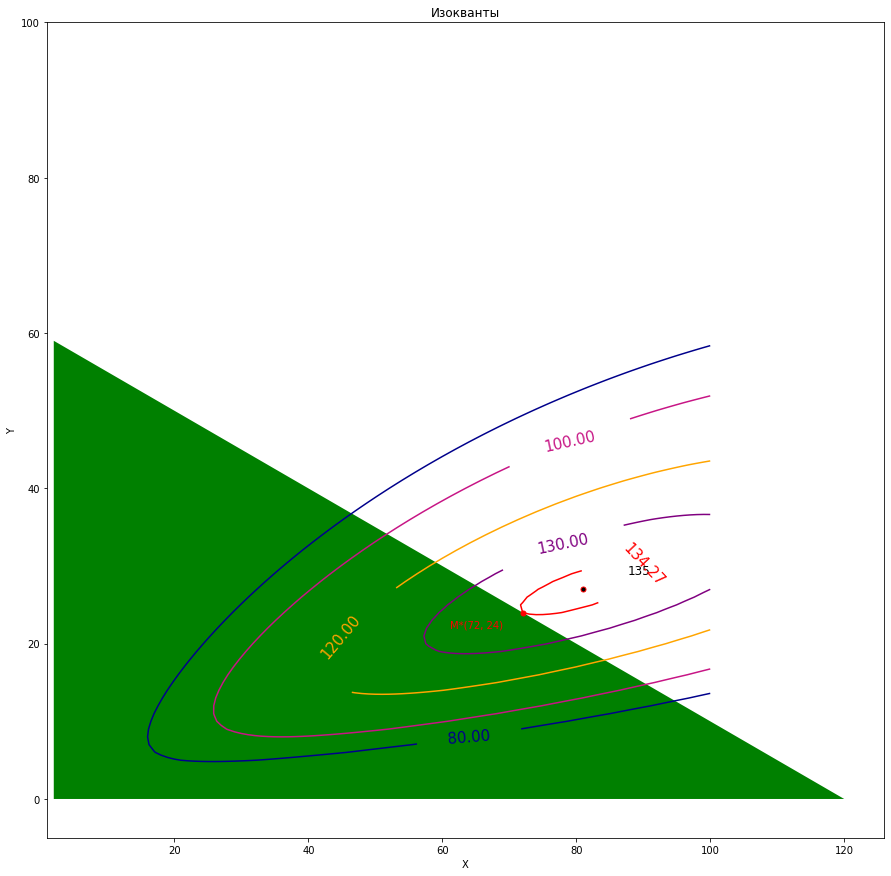

In [14]:
opt.contour_plot()